# 1. Prepare Data

### 1.1 Import Libraries

In [1]:
#load packages
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.cross_validation import train_test_split
from sklearn import ensemble, linear_model, svm, neighbors, tree, naive_bayes
from sklearn.metrics import precision_score, auc,roc_curve

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1.2 Load tha Data

In [2]:
df_train = pd.read_csv("D:/personal/kaggle datasets/titanic/titanic_train.csv")
df_test = pd.read_csv("D:/personal/kaggle datasets/titanic/titanic_test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
combine = [df_train,df_test]

# 2. Data Cleaning

### 2.1 Dealing with missing values

In [6]:
for data in combine:
    print(data.isnull().sum() / len(data) * 100)
    print('-'*20)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
--------------------
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64
--------------------


Output shows that 'Cabin' column from both files has more than 75% of data missing, thus it can be removed.

Age , Fare , Embarked also have missing data, but it can be imputed.

In [7]:
for data in combine:
    for var in ['Age','Fare']:
        data[var].fillna(data[var].median(),inplace=True)

df_train['Embarked'].fillna('S',inplace = True)

In [8]:
y = df_train['Survived']

### 2.2 Retrive the salutation and apply get_dummies

In [9]:
for data in combine:
    data['Salutation'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [10]:
for data in combine:
    print(pd.crosstab(data['Salutation'],data['Sex']))
    print('-'*15)

Sex         female  male
Salutation              
Capt             0     1
Col              0     2
Countess         1     0
Don              0     1
Dr               1     6
Jonkheer         0     1
Lady             1     0
Major            0     2
Master           0    40
Miss           182     0
Mlle             2     0
Mme              1     0
Mr               0   517
Mrs            125     0
Ms               1     0
Rev              0     6
Sir              0     1
---------------
Sex         female  male
Salutation              
Col              0     2
Dona             1     0
Dr               0     1
Master           0    21
Miss            78     0
Mr               0   240
Mrs             72     0
Ms               1     0
Rev              0     2
---------------


In [11]:
for data in combine:
    data['Salutation'] = data['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','Mlle','Ms','Mme'], 'Others')

In [12]:
# Copying for future references
df = df_train.copy()

In [13]:
df_train_dummies = pd.get_dummies(df_train[['Sex','Embarked','Salutation']])

df_test_dummies = pd.get_dummies(df_test[['Sex','Embarked','Salutation']])

In [14]:
df_train = df_train.join(df_train_dummies)

df_test = df_test.join(df_test_dummies)

### 2.3 Generating length of ticket 

In [15]:
df_train['Ticket_Len'] = df_train['Ticket'].apply(lambda x: len(x))

df_test['Ticket_Len'] = df_test['Ticket'].apply(lambda x: len(x))

# 3. Exploratory Analysis with Statistics

In [16]:
for x in ['Sex','Pclass', 'Embarked','SibSp', 'Parch','Salutation']:
    print(df[[x,'Survived']].groupby([x]).mean().reset_index())
    print('-'*20)

      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
--------------------
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
--------------------
  Salutation  Survived
0     Master  0.575000
1       Miss  0.697802
2         Mr  0.156673
3        Mrs  0.792000
4     Others  0.444444
--------------------


##### Above results show correaltion between features and target variable

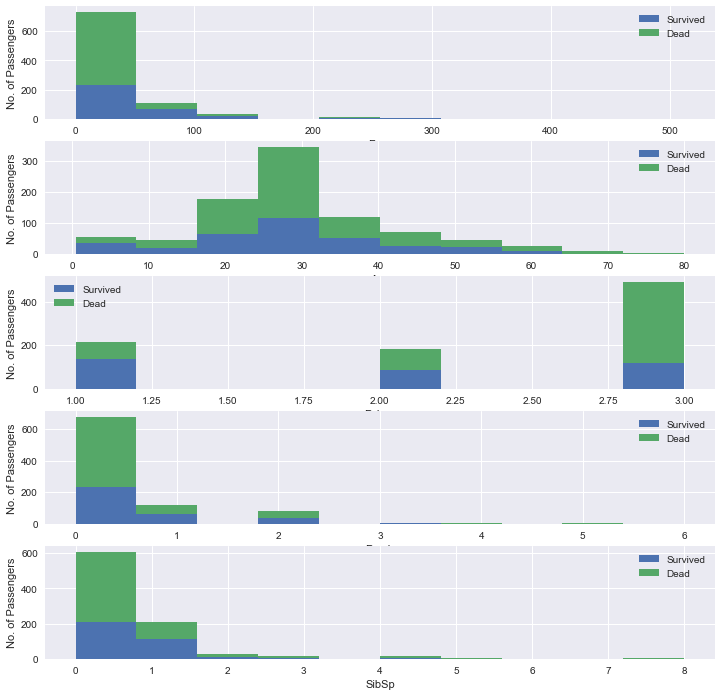

In [17]:
plt.subplot(511)
plt.hist([df[df['Survived']==1]['Fare'],df[df['Survived']==0]['Fare']],stacked=True,label=['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('No. of Passengers')
plt.legend()

plt.subplot(512)
plt.hist([df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age']],stacked=True,label=['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.legend()

plt.subplot(513)
plt.hist([df[df['Survived']==1]['Pclass'],df[df['Survived']==0]['Pclass']],stacked=True,label=['Survived','Dead'])
plt.xlabel('Pclass')
plt.ylabel('No. of Passengers')
plt.legend()

plt.subplot(514)
plt.hist([df[df['Survived']==1]['Parch'],df[df['Survived']==0]['Parch']],stacked=True,label=['Survived','Dead'])
plt.xlabel('Parch')
plt.ylabel('No. of Passengers')
plt.legend()

plt.subplot(515)
plt.hist([df[df['Survived']==1]['SibSp'],df[df['Survived']==0]['SibSp']],stacked=True,label=['Survived','Dead'])
plt.xlabel('SibSp')
plt.ylabel('No. of Passengers')
plt.legend()

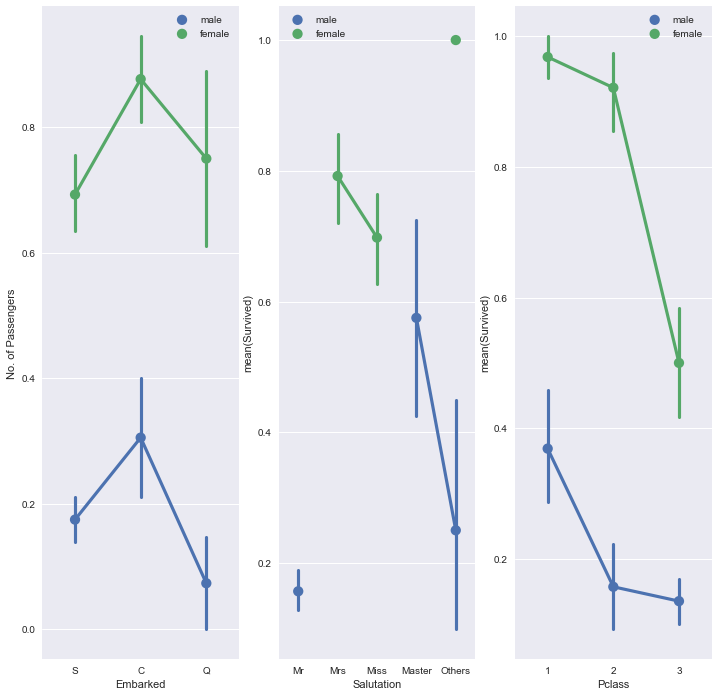

In [18]:
plt.subplot(131)
sns.pointplot(x='Embarked',y='Survived',hue='Sex',data=df)
plt.xlabel('Embarked')
plt.ylabel('No. of Passengers')
plt.legend()

plt.subplot(132)
sns.pointplot(x='Salutation',y='Survived',hue='Sex',data=df)
plt.xlabel('Salutation')
plt.legend()

plt.subplot(133)
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=df)
plt.xlabel('Pclass')
plt.legend()

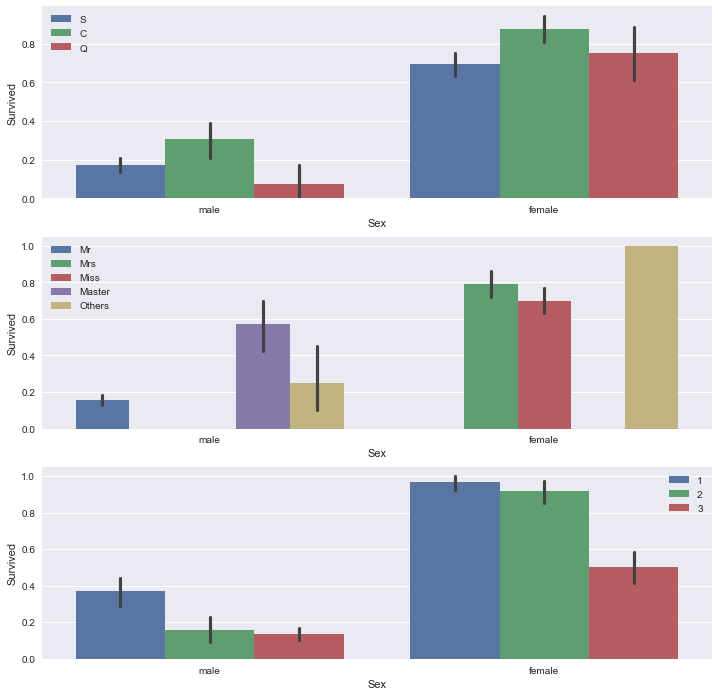

In [19]:
plt.subplot(311)
sns.barplot(x='Sex',y='Survived',hue='Embarked',data=df)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.legend()

plt.subplot(312)
sns.barplot(x='Sex',y='Survived',hue='Salutation',data=df)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.legend()

plt.subplot(313)
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=df)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.legend()

###  Dropping unnecessary columns and Splitting Data

In [20]:
psid = df_test['PassengerId']

df_train.drop(['Ticket','Cabin','Name','PassengerId','Salutation','Embarked','Sex'],axis=1,inplace=True)

df_test.drop(['Ticket','Cabin','Name','PassengerId','Salutation','Embarked','Sex'],axis=1,inplace=True)

In [21]:
y = df_train.pop('Survived')

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.33, random_state=42)

# 4.Model Training

In [22]:
ALGO = [
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    linear_model.LogisticRegressionCV(),
    
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    tree.DecisionTreeClassifier(),
    
    svm.LinearSVC(),    
    
    neighbors.KNeighborsClassifier()
]

In [23]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in ALGO:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 2)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 2)
    MLA_compare.loc[row_index, 'MLA Precission'] = round(precision_score(y_test, predicted),2)
    MLA_compare.loc[row_index, 'MLA AUC'] = round(auc(fp, tp),2)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA AUC
1,GradientBoostingClassifier,0.92,0.83,0.85,0.81
3,LogisticRegressionCV,0.82,0.83,0.80,0.82
4,BernoulliNB,0.79,0.81,0.78,0.79
5,GaussianNB,0.79,0.81,0.74,0.81
7,LinearSVC,0.81,0.81,0.88,0.78
0,ExtraTreesClassifier,0.99,0.79,0.75,0.78
2,RandomForestClassifier,0.97,0.78,0.76,0.76
6,DecisionTreeClassifier,0.99,0.75,0.69,0.74
8,KNeighborsClassifier,0.80,0.72,0.70,0.70


In [24]:
gbc = ensemble.ExtraTreesClassifier()

In [25]:
gbc.fit(df_train,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [26]:
pd.concat((pd.DataFrame(df_train.iloc[:, 1:].columns, columns = ['Features']), 
           pd.DataFrame(gbc.feature_importances_, columns = ['Importance'])), 
          axis = 1).sort_values(by='Importance', ascending = False)

,Features,Importance
1,SibSp,0.200022
4,Sex_female,0.178980
12,Salutation_Mrs,0.139505
0,Age,0.101004
5,Sex_male,0.084840
15,NaN,0.063804
2,Parch,0.051917
11,Salutation_Mr,0.037511
6,Embarked_C,0.037121
3,Fare,0.027545


In [27]:
predicted = gbc.predict(df_test)

In [28]:
sample = pd.DataFrame(predicted,columns=['P'])

sample['PassengerId'] = psid

sample.columns = [['Survived','PassengerId']]

sample = sample[['PassengerId','Survived']]

sample.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [29]:
sample.to_csv("D:\\personal\\kaggle datasets\\titanic\\sample_submission.csv", index=False)